<h1><center>Machine Learning Challenge: Image Classification</center></h1>

Goutham Indiran Deekshit | u195004 <br>
Manav Mishra | u558101 <br>
Sadjia Safdari | u265740

**Load packages**

In [1]:
import numpy as np
%pylab inline --no-import-all
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

## Neural nets
#.....................................
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import Conv2D, Flatten, MaxPooling2D, GaussianNoise
from keras.callbacks import History
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.metrics import TopKCategoricalAccuracy, SparseTopKCategoricalAccuracy

## Image processing packages
#.....................................
from skimage.transform import resize
from skimage import data
from skimage.filters import threshold_otsu, rank
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.feature import canny
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
import cv2

## Matplot lib
#.....................................
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Random Forest
import random
from sklearn import ensemble #psychic learn we use ensemble - it has random forest classifier



Populating the interactive namespace from numpy and matplotlib


In [2]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


## Task 1

**Data**

In [3]:
with np.load("data/training-dataset.npz") as data:
        img = data["x"] # 97843200
        lbl = data["y"] # 124800

(124800, 784)


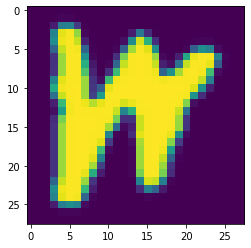

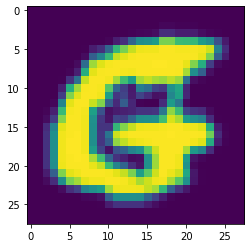

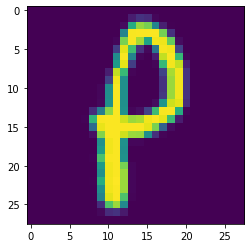

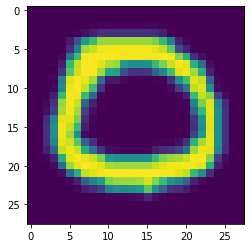

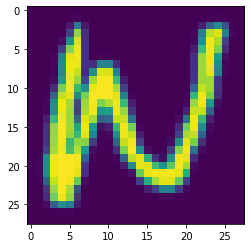

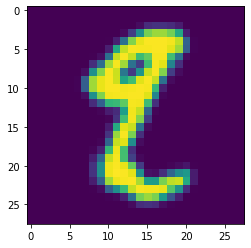

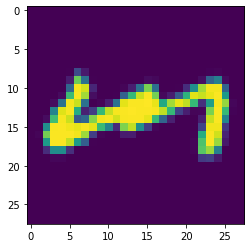

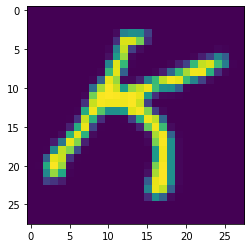

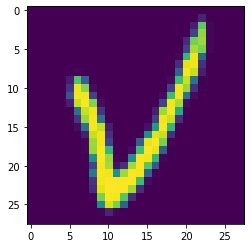

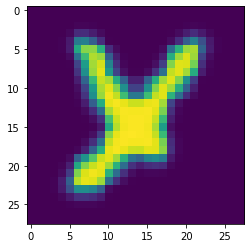

In [4]:
print(img.shape)

for im in range(10):
    image = img[im]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()

### 1.1 Neural Networks

**Splitting data**

In [26]:
# Splitting data into train and test with 80% for training data 

X_train, X_val_test, y_train, y_val_test = train_test_split(img, lbl, test_size=0.2,random_state=1) 

# Splitting 

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.3, random_state=1)

# Visualising the shape of the train and test data
print(X_train.shape) 
print(X_test.shape) 
print(X_val.shape) 
print(y_test.shape) 
print(y_val.shape) 


(99840, 784)
(7488, 784)
(17472, 784)
(7488,)
(17472,)


**Preprocessing data**

In [27]:
# Preprocessing the data so that it runs faster during fitting the model
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
y_val = y_val.astype("float32")

**Transform data**

In [28]:
# One hot decoding 
onehot = LabelBinarizer() # transform categorical target to dummies to train the NN
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.fit_transform(y_val)
Y_test   = onehot.transform(y_test)


**Fitting the model**

In [29]:
# Fitting the compiling and fitting the sequential model
#.....................................

es = EarlyStopping(monitor="val_loss")

model = Sequential() # initiates model
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(350, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# define parameters for training of the model    
optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy']) # for classification, the loss function should be categorical_crossentropy
history = model.fit(X_train, Y_train, epochs=100, batch_size=450, validation_data=(X_val, Y_val), verbose=1, callbacks = [es])

# accuracy 0.9056 > 17/100

Epoch 1/100
222/222 [==============================] - 56s 250ms/step - loss: 2.6857 - accuracy: 0.3464 - val_loss: 1.1404 - val_accuracy: 0.6784
Epoch 2/100
222/222 [==============================] - 45s 204ms/step - loss: 1.0182 - accuracy: 0.7150 - val_loss: 0.8111 - val_accuracy: 0.7735
Epoch 3/100
222/222 [==============================] - 45s 201ms/step - loss: 0.7488 - accuracy: 0.7893 - val_loss: 0.6517 - val_accuracy: 0.8194
Epoch 4/100
222/222 [==============================] - 44s 198ms/step - loss: 0.6124 - accuracy: 0.8299 - val_loss: 0.5683 - val_accuracy: 0.8439
Epoch 5/100
222/222 [==============================] - 44s 199ms/step - loss: 0.5346 - accuracy: 0.8530 - val_loss: 0.5091 - val_accuracy: 0.8595
Epoch 6/100
222/222 [==============================] - 45s 201ms/step - loss: 0.4774 - accuracy: 0.8682 - val_loss: 0.4827 - val_accuracy: 0.8662
Epoch 7/100
222/222 [==============================] - 49s 223ms/step - loss: 0.4504 - accuracy: 0.8742 - val_loss: 0.4525 -

**Plot accuracy**

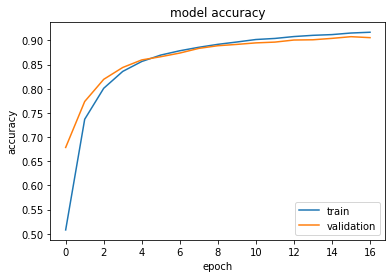

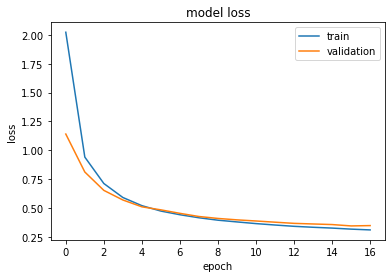

In [30]:
# list all data in history

accuracy = history.history['accuracy']
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**Saving Model**

In [31]:
# # Save the model to disk.
# model.save_weights('model.h5')

# # Load the model from disk later using:
# model.load_weights('model.h5')



**Predictions**

In [32]:
# Predicting the classes on test set and printing the accuracy
y_pred = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred)) # 0.889


  1/234 [..............................] - ETA: 30s

/Users/Sadjia/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


234/234 [==============================] - 1s 5ms/step
0.005876068376068376


**Evaluate and summary**

In [33]:
# Evaluating the model
model.evaluate(X_test,Y_test)

# Model summary
model.summary()
print((y_pred[:10]))
print((y_test[:10]).astype('int32'))

234/234 [==============================] - 2s 6ms/step - loss: 0.3462 - accuracy: 0.9012
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 350)               280350    
_________________________________

### 1.2 Random Forest

(124800, 784)


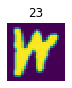

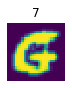

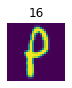

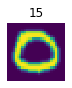

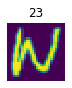

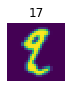

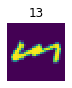

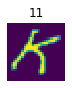

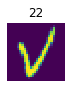

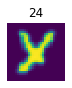

In [56]:
with np.load('data/training-dataset.npz') as data:
    img = data['x']
    lbl = data['y']
print(img.shape)


for im in range(10):
    image = img[im]
    label = lbl[im]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.subplot(2,5, im+1)
    plt.axis("off")
    plt.imshow(pixels)
    plt.title('%i' %label)
    plt.show()

In [57]:
X_train, X_val, y_train, y_val = train_test_split(img, lbl, test_size=0.2, random_state=1) #first split train 80, val+test 20

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.3
                   , random_state=1) 

In [58]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(99840, 784)
(7488, 784)
(17472, 784)


In [61]:
#Using Random Forest classifier
#oob_score This is a random forest cross validation method 
#This comes out very handy while scalling up a particular function from prototype to final dataset.

n_estimators = np.arange(100,1100,100)
import time
t0 = time.time()
for i in n_estimators: 
    classifier = ensemble.RandomForestClassifier(n_estimators = i, oob_score = True, n_jobs = -1,random_state =50)
    classifier.fit(X_train,y_train)
    # evaluating the model on the validation set and checking best value of k
    score = classifier.score(X_val,y_val)
    print("No. of trees = %d, accuracy=%.2f%%" % (i, score * 100))

t1 = time.time()
total = t1-t0
print(total) 

No. of trees = 100, accuracy=87.96%
No. of trees = 200, accuracy=88.32%
No. of trees = 300, accuracy=88.51%
No. of trees = 400, accuracy=88.57%
No. of trees = 500, accuracy=88.64%
No. of trees = 600, accuracy=88.71%
No. of trees = 700, accuracy=88.67%
No. of trees = 800, accuracy=88.74%
No. of trees = 900, accuracy=88.70%
No. of trees = 1000, accuracy=88.76%
3784.6905221939087


In [62]:
#training model on train data with best value of n_estimators
classifier = ensemble.RandomForestClassifier(n_estimators = 1000, oob_score = True, n_jobs = -1,random_state =50)
import time
t0 = time.time()
classifier.fit(X_train,y_train)
t1 = time.time()
total = t1-t0
print(total) 
#takes approx. 20 minutes

635.003919839859


In [63]:
# predict on test set
score = classifier.score(X_test,y_test) 
score # 0.8791


0.8791399572649573

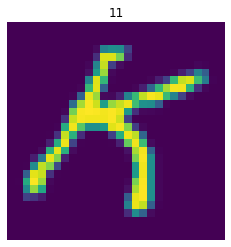

In [64]:
im=7 #try changing different values 
view_img = img[im]
label = lbl[im]
view_img = np.array(view_img, dtype='float')
pixels = view_img.reshape((28, 28))
plt.axis("off")
plt.imshow(pixels)
plt.title('%i' %label)
plt.show()

In [65]:
# check the prediction for the above image
classifier.predict(img[[7]])

array([11], dtype=uint8)

**Adding noise**

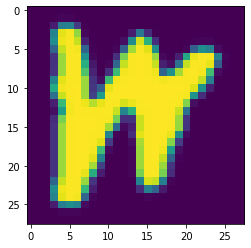

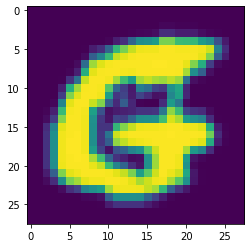

In [66]:
# Adding noise to image

original_image = img
for im in range(2):
    img_test = original_image[im]
    img_test = np.array(img_test, dtype='float64')
    pixels = img_test.reshape((28,28))
    plt.imshow(pixels)
    plt.show()

In [67]:
from skimage.util import random_noise

In [68]:
test_image = np.array(original_image, dtype='float64')
image_with_noise = random_noise(test_image, mode="s&p") #salt and pepper noise


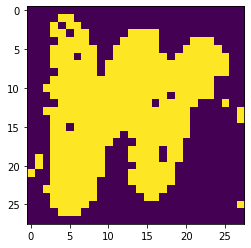

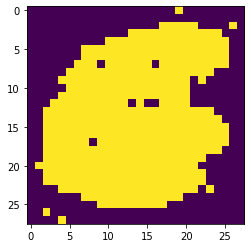

In [69]:
for im in range(2):
    img_test = image_with_noise[im]
    img_test = np.array(img_test, dtype='float64')
    pixels = img_test.reshape((28,28))
    plt.imshow(pixels)
    plt.show()


In [70]:
X_train_noise, X_val_noise, y_train_noise, y_val_noise = train_test_split(image_with_noise, lbl, test_size=0.2, random_state=1) #first split train 80, val+test 20

X_val_noise, X_test_noise, y_val_noise, y_test_noise = train_test_split(X_val_noise, y_val_noise, test_size=0.3
                   , random_state=1) 


In [71]:
classifier = ensemble.RandomForestClassifier(n_estimators = 1000, oob_score = True, n_jobs = -1,random_state =50)
import time
t0 = time.time()
classifier.fit(X_train_noise,y_train_noise)
score = classifier.score(X_val_noise, y_val_noise)

t1 = time.time()
total = t1-t0
print(total) 

score # 0.8466

448.1061809062958


In [73]:
score = classifier.score(X_test_noise, y_test_noise)
score # 0.8462

0.8462873931623932

### 1.3 K-Nearest Neighbors

**Splitting data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=1) #first split train 80, test 20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # from train 80, splitting 20 for validation


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5) # try for different k value here, and when K= 5 yeilds better accuracy
classifier.fit(X_train, y_train)


In [ ]:
t0 = time.time() 
y_pred = classifier.predict(X_val) #predicting on the validation set
t1 = time.time()
total = t1-t0 # to calculate the time taken for the classifier to predict
print(total)

In [ ]:
print(classification_report(y_val, y_pred)) # 0.85

In [ ]:
t0 = time.time()
y_pred = classifier.predict(X_test)
t1 = time.time()
total = t1-t0
print(total)

In [ ]:
print(classification_report(y_test, y_pred)) # 0.85

## **Task 2**

### 2.1 Adding Gaussian noise to CNN model

In [34]:
# Making the model Robust against noises in the image
test_data = np.load('data/test-dataset.npy') 
print(test_data.shape)


(10000, 30, 140)


In [35]:
# compiling and fitting the sequential model
#.....................................

es = EarlyStopping(monitor= 'val_loss')
optimizer = Adam(lr=0.0001)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',strides=(1, 1),activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GaussianNoise(0.5))
model.add(Flatten())
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(360, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(Y_train.shape[1], activation='softmax')) # We need to have as many units as classes, and softmax activation

# For classification, the loss function should be categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
history1 = model.fit(X_train, Y_train, epochs=100, batch_size = 450, validation_data = (X_val, Y_val), verbose=1, callbacks = [es])

# accuracy of 0.9253 > 23/100

Epoch 1/100
222/222 [==============================] - 71s 317ms/step - loss: 3.2142 - accuracy: 0.1127 - val_loss: 1.2862 - val_accuracy: 0.6604
Epoch 2/100
222/222 [==============================] - 68s 305ms/step - loss: 1.2164 - accuracy: 0.6737 - val_loss: 0.8304 - val_accuracy: 0.7950
Epoch 3/100
222/222 [==============================] - 68s 304ms/step - loss: 0.8214 - accuracy: 0.7936 - val_loss: 0.6672 - val_accuracy: 0.8421
Epoch 4/100
222/222 [==============================] - 67s 302ms/step - loss: 0.6643 - accuracy: 0.8400 - val_loss: 0.5695 - val_accuracy: 0.8700
Epoch 5/100
222/222 [==============================] - 69s 310ms/step - loss: 0.5801 - accuracy: 0.8631 - val_loss: 0.5287 - val_accuracy: 0.8806
Epoch 6/100
222/222 [==============================] - 69s 312ms/step - loss: 0.5229 - accuracy: 0.8787 - val_loss: 0.5038 - val_accuracy: 0.8858
Epoch 7/100
222/222 [==============================] - 68s 307ms/step - loss: 0.4900 - accuracy: 0.8878 - val_loss: 0.4697 -

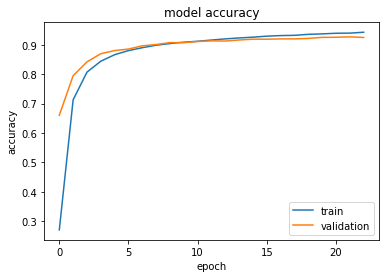

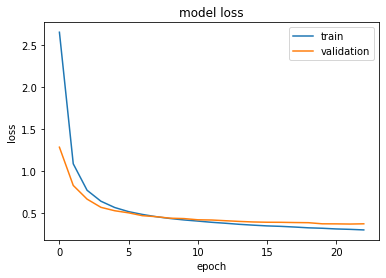

234/234 [==============================] - 3s 12ms/step
0.005208333333333333


In [36]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
y_pred1 = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred1))

**Predictions**

In [37]:
y_pred1 = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred1))
print(y_pred1)

234/234 [==============================] - 3s 13ms/step
0.005208333333333333
[ 5 15  5 ... 21  0  9]


### 2.2 Image processing

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu, rank, roberts, sobel, sobel_h, scharr, scharr_v, scharr_h,threshold_isodata
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, disk
from skimage.color import label2rgb
from skimage.feature import canny
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
from scipy import ndimage as ndi
from skimage import feature, io
from skimage.segmentation import active_contour
from skimage import measure
from skimage.color import rgb2gray
from skimage.filters.rank import mean,  mean_bilateral

import cv2

In [7]:
# load test-dataset
img_data = np.load('data/test-dataset.npy')
img_data[0].shape

(30, 140)

In [7]:
# from skimage.feature import hog
# import numpy as np

# image_height = 48
# image_width = 48
# window_size = 24
# window_step = 6

# def sliding_hog_windows(imge):
#     hog_vector = []
#     for y in range(0, image_height, window_step):
#         for x in range(0, image_width, window_step):
#             window = imge[y:y+window_size, x:x+window_size]
#             hog_vector.extend(hog(window, orientations=8, pixels_per_cell=(8, 8),
#                                             cells_per_block=(1, 1), visualise=False))
#     return hog_vector
    
# imge = img_data[0]
# hog_vector = sliding_hog_windows(imge)

(30, 140)

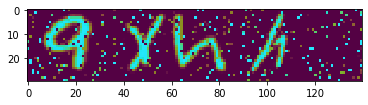

In [60]:
sample_image = cv2.imread('sample_dataset/01240808.png')
plt.imshow(sample_image)
prediction_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
prediction_image.shape

(30, 140, 3)

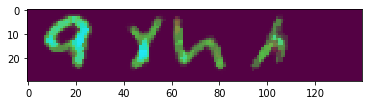

In [63]:
median_blr = cv2.medianBlur(sample_image, 5)
plt.imshow(median_blr)
median_blr.shape

In [64]:
copy = median_blr.copy()
gray = cv2.cvtColor(median_blr, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 140)

In [65]:
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
print(thresh.shape)
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]


(30, 140)


104 20 1 2
61 5 22 20
94 4 14 20
43 4 13 21
7 3 20 21
[61, 22, 5, 20, 94, 14, 4, 20, 43, 13, 4, 21, 7, 20, 3, 21]


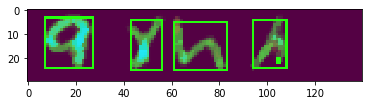

In [66]:
coord_list = []
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h]
    print(x,y,w,h)
    if w > 9  or h > 10 :
        coord_list.append(x)
        coord_list.append(w)
        coord_list.append(y)
        coord_list.append(h)
    
   # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),1)
    ROI_number += 1

plt.imshow(copy)
print(coord_list)

In [67]:
#-------------------------------------------------------------
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram


plt.tight_layout()
from skimage.filters.rank import median
from skimage.morphology import disk, ball

<Figure size 432x288 with 0 Axes>

In [68]:
import itertools
def split_image(coord_list):
    new_coord=[]
    updated_coord=[]
    final_coord=[]
    for i in range(len(coord_list)):
            args = [iter(coord_list)] * 4
            new_coord = list(itertools.zip_longest(*args, fillvalue=None))
    print(new_coord)
    return(sorted(new_coord))

split_image(coord_list)

[(61, 22, 5, 20), (94, 14, 4, 20), (43, 13, 4, 21), (7, 20, 3, 21)]


[(7, 20, 3, 21), (43, 13, 4, 21), (61, 22, 5, 20), (94, 14, 4, 20)]

[(61, 22, 5, 20), (94, 14, 4, 20), (43, 13, 4, 21), (7, 20, 3, 21)]


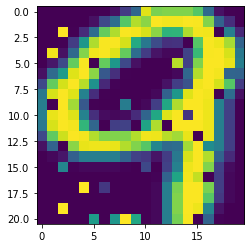

(28, 28)


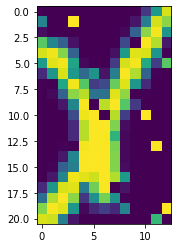

(28, 28)


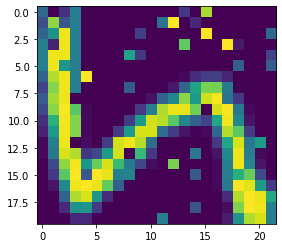

(28, 28)


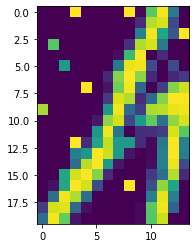

(28, 28)


In [71]:
import numpy as asarray
#for i in imag_data:
imk=prediction_image
coords= split_image(coord_list)
image_pred=[]
pred_store=[]
for i in range(len(coords)):
    #img[x:x+w, y:y+h]
    imtest1=imk[coords[i][2]:coords[i][2]+coords[i][3],coords[i][0]:coords[i][0]+coords[i][1]]
    plt.imshow(imtest1)
    plt.show()
    res1 = cv2.resize(imtest1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    res1.shape
    print(res1.shape)
    #pred_img1 = np.expand_dims(res1, axis=0)
    image_pred.append(np.asarray(res1))
image_pred=np.array(image_pred)
import cv2

In [72]:
image_pred.shape

(4, 28, 28)

In [73]:
image_pred = image_pred.reshape(image_pred.shape[0], 28, 28, 1).astype("float32") / 255
print("shape",(image_pred.shape) )
preds1=model.predict_classes(image_pred, verbose=1)
print(preds1[:5])


shape (4, 28, 28, 1)
1/1 [==============================] - 0s 398ms/step
[16 23 22 22]


In [74]:
# print(accuracy_score(y_test, image_pred))

ValueError: Found input variables with inconsistent numbers of samples: [7488, 4]

**OpenCV**

In [ ]:
import cv2
from scipy import ndimage 

image = cv2.imread('sample_dataset/01240808.png')
image = scipy.ndimage.gaussian_filter(image, sigma = 2)
blurred_f = ndimage.gaussian_filter(image, 2)
plt.imshow(blurred_f)
#copy = sharpened.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    cv2.rectangle(copy,(x,y),(x+w,y+h),(36,255,12),2)
    ROI_number += 1

plt.imshow(copy)

In [ ]:
# Loop through contours and draw the bounds in red
contours = skimage.measure.find_contours(img, level)

for contour in contours:
    img = drawShape(img, contour, [255, 0, 0]) 

def drawShape(img, coordinates, color):
    # In order to draw our line in red
    img = skimage.color.gray2rgb(img)

    # Make sure the coordinates are expressed as integers
    coordinates = coordinates.astype(int)

    img[coordinates[:, 0], coordinates[:, 1]] = color

    return img

**Predictions**

In [ ]:
# https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/

**Save predictions into csv file**

In [ ]:
# numpy.savetxt('C:/localpath/test.csv',prediction, ,delimiter=',')

# predictions = regressor.predict(X_test)
# res = pd.DataFrame(predictions)
# res.index = X_test.index # its important for comparison
# res.columns = ["prediction"]
# res.to_csv("prediction_results.csv")

# Previous Code

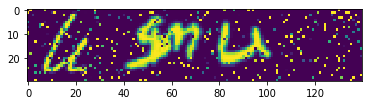

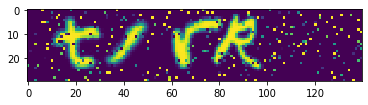

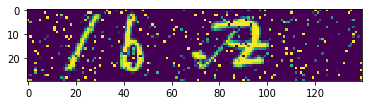

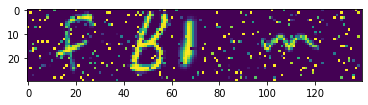

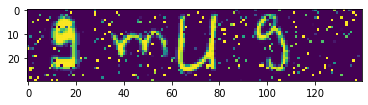

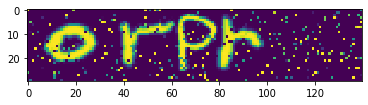

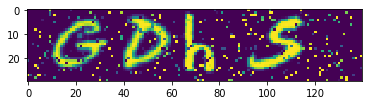

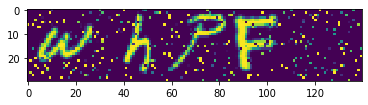

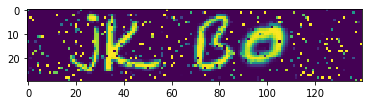

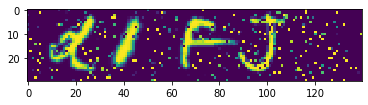

In [93]:
data = np.load("data/test-dataset.npy")

#print(data.shape)
for im in range(10):
    img_test = data[im]
    img_test = np.array(img_test, dtype='float')
    pixels = img_test.reshape((30, 140))
    plt.imshow(pixels)
    plt.show()

(10000, 30, 140)

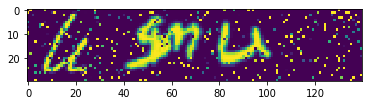

In [94]:
# plt.imshow(data[0].reshape((30, 140)))
# data.shape

TensorShape([244, 244, 140])

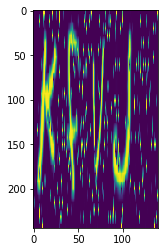

In [95]:
# reshaped_image = tf.image.resize(data, (244, 244))
# plt.imshow(reshaped_image[0])
# reshaped_image.shape

(10000, 30, 140)

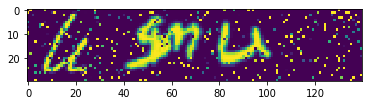

In [96]:
# import cv2
# plt.imshow(data[0])
# data.shape

(244, 244, 140)


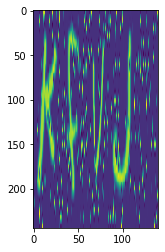

In [98]:
# reshaped_data = cv2.resize(data, dsize=(244, 244), interpolation=cv2.INTER_CUBIC)
# print(reshaped_data.shape)

# plt.imshow(reshaped_data[0])

In [99]:
import torch
#torch.__version__

In [100]:
# from skimage import io, transform
# img = transform.resize(data, (28, 28))
# img

array([[[14.71866803, 13.10380834, 13.80604832, ..., 14.41726202,
         16.68337571, 16.40588775],
        [10.81245545, 12.14020575, 11.96412392, ..., 15.90011011,
         12.20745598, 13.06065414],
        [11.07137726,  9.38688009, 15.14440048, ..., 18.11677138,
         11.72472636, 11.52306737],
        ...,
        [13.49280723, 16.16619378, 14.34381029, ..., 15.63681601,
         11.86504832, 11.8364544 ],
        [11.72608563, 13.29395721, 18.99078167, ..., 13.32385133,
         15.63753304,  8.90853025],
        [14.81158409, 13.47684947, 11.77686664, ...,  9.82788086,
         10.19102731, 21.76563265]],

       [[12.27874919,  8.73351974, 14.97487772, ..., 11.60975957,
         13.75722859, 12.45687298],
        [12.84347919, 17.5719261 , 12.45907797, ..., 13.44491585,
         11.36393193, 14.1781619 ],
        [14.151344  , 13.06333288, 12.63471799, ..., 13.20004235,
         16.54724934, 13.74321997],
        ...,
        [10.31164189, 14.64153091, 11.93456936, ..., 1

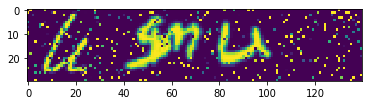

In [101]:
# plt.imshow(data[0])

In [ ]:
# from skimage.transform import resize
# resized_image = resize(data, (28, 28))
# resized_image

# plt.imshow(reshaped_image[0])

In [ ]:
# import cv2
# from skimage.util import random_noise

# sp = random_noise(I, mode="s&p", seed=None, clip=True)
# # salt = random_noise(I, mode="salt", seed=None, clip=True)
# # pepper = random_noise(I, mode="pepper", seed=None, clip=True)

In [ ]:
# plt.imshow(sp), plt.title("Salt & Pepper")

In [ ]:
# from keras.layers import Lambda, Input
# from keras.models import Model


# # 3 channel images of arbitrary shape
# inp = Input(shape=(None, None, 3))
# try:
#     out = Lambda(lambda image: tf.image.resize_images(image, (128, 128)))(inp)
# except :
#     # if you have older version of tensorflow
#     out = Lambda(lambda image: tf.image.resize_images(image, 128, 128))(inp)

# model = Model(input=inp, output=out)
# model.summary()

# X = scipy.ndimage.imread('test.jpg')

# out = model.predict(X[np.newaxis, ...])

# fig, Axes = plt.subplots(nrows=1, ncols=2)
# Axes[0].imshow(X)
# Axes[1].imshow(np.int8(out[0,...]))

# plt.show()

In [ ]:
# ## For checking purpose (Slicing the images) 
# ## formula to slice the rectangled images img[y:y+h,x:x+w] 
# ## (x,y,widht,height gets printed while preprocessing images 
# ## look for print("b",(minc, minr), maxc - minc, maxr - minr,rect) )
# img = img_data[245]
# image1 = img[4:25, 42:72]
# image1[image1 < 128] = 0
# image1 = np.array(image1, dtype='float')
# pixels1 = img
# plt.imshow(pixels1)
# plt.show()


# # checking the shape of image
# image1.shape
# # Resizing the image to 28*28
# res = cv2.resize(image1, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
# res.shape
# # expanding the dimension of image from 28,28 to (1,28,28)
# pred_img = np.expand_dims(res, axis=0)
# pred_img.shape
# ## reshaping the predicted image from (1,28,28) to (1,28,28,1)
# ## and converting it to float and dividing it by 255 pixels 
# ## to get values between 0-1
# pred_img = pred_img.reshape(pred_img.shape[0], 28, 28, 1).astype("float32") / 255
# pred_img.shape

# # Predicting the image
# model.predict_classes(pred_img, verbose=1)
